#CNN-Application
**Content:**

    1. Build Convolution Neural Networks (LeNet)
    2. Build Networks Using Blocks (VGG)
    3. Image Classification Using LeNet and VGG
        3.1. Concrete Crack Images Dataset
        3.2. Cassava Leaf Disease Dataset

In [1]:
import tensorflow as tf

##CNN Basic

In [ ]:
input = tf.constant([[1., 2., 3., ],
                     [4., 5., 6.],
                     [7., 8., 9.]])

In [ ]:
input = tf.reshape(input, [1, 3, 3, 1])
input

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)>

**Conv2D**

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2, 2), 
                            kernel_initializer = tf.keras.initializers.Ones())
output = conv_layer(input)
output

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[12.],
         [16.]],

        [[24.],
         [28.]]]], dtype=float32)>

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2, 2), padding='same', 
                            kernel_initializer = tf.keras.initializers.Ones())
output = conv_layer(input)
output

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[12.],
         [16.],
         [ 9.]],

        [[24.],
         [28.],
         [15.]],

        [[15.],
         [17.],
         [ 9.]]]], dtype=float32)>

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2, 2), 
                            strides=(2,2), padding='same', 
                            kernel_initializer = tf.keras.initializers.Ones())
output = conv_layer(input)
output

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[12.],
         [ 9.]],

        [[15.],
         [ 9.]]]], dtype=float32)>

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2, 2), strides=(2,2),
                            padding='same', activation="sigmoid",
                            kernel_initializer = tf.keras.initializers.Ones())
output = conv_layer(input)
output

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[0.9999938 ],
         [0.9998766 ]],

        [[0.99999964],
         [0.9998766 ]]]], dtype=float32)>

**Multiple input and output chanels**

In [ ]:
input_mul = tf.ones((1, 3, 3, 3))
input_mul

<tf.Tensor: shape=(1, 3, 3, 3), dtype=float32, numpy=
array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)>

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2, 2), strides=(2,2),
                            padding='same', input_shape=input[1:],
                            kernel_initializer = tf.keras.initializers.Ones())
output = conv_layer(input_mul)
output

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[12.],
         [ 6.]],

        [[ 6.],
         [ 3.]]]], dtype=float32)>

In [ ]:
input_mul = tf.ones((2, 3, 3, 3))
input_mul.shape

TensorShape([2, 3, 3, 3])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=4, kernel_size=(2, 2), strides=(2,2),
                            padding='same', input_shape=input[1:],
                            kernel_initializer = tf.keras.initializers.Ones())
output = conv_layer(input_mul)
output.shape

TensorShape([2, 2, 2, 4])

In [ ]:
input_mul = tf.ones((1, 7, 7, 1))
input_mul.shape

TensorShape([1, 7, 7, 1])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3),
                            padding='same',
                            kernel_initializer = tf.keras.initializers.Ones())
output = conv_layer(input_mul)
output.shape

TensorShape([1, 7, 7, 1])

In [ ]:
output[0][0]

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[4.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [4.]], dtype=float32)>

**Pooling Layer**

In [ ]:
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1))
output = max_pool_2d(input)
output

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[5.],
         [6.]],

        [[8.],
         [9.]]]], dtype=float32)>

In [ ]:
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
output = max_pool_2d(input)
output

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[5.]]]], dtype=float32)>

In [ ]:
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                                           padding="same")
output = max_pool_2d(input)
output

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[5.],
         [6.]],

        [[8.],
         [9.]]]], dtype=float32)>

In [ ]:
avg_pool_2d = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1))
output = avg_pool_2d(input)
output

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[3.],
         [4.]],

        [[6.],
         [7.]]]], dtype=float32)>

In [ ]:
avg_pool_2d = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2))
output = avg_pool_2d(input)
output

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[3.]]]], dtype=float32)>

In [ ]:
avg_pool_2d = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2),
                                               padding="same")
output = avg_pool_2d(input)
output

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[3. ],
         [4.5]],

        [[7.5],
         [9. ]]]], dtype=float32)>

##1.Build Convolution Neural Networks (LeNet)
- [Paper](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
- LeNet(LeNet-5):
    - A convolutional encoder consisting of two convolutional layers
    - A dense block consisting of three fully-connected layers
- Visualization: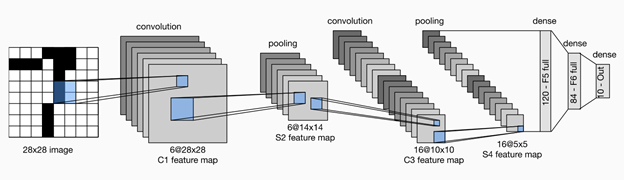

In [ ]:
lenet_model = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same'),
                    tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
                    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
                    tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(120, activation='relu'),
                    tf.keras.layers.Dense(84, activation='relu'),
                    tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
input = tf.random.uniform((1, 28, 28, 1))
for layer in lenet_model.layers:
    input = layer(input)
    print(layer.__class__.__name__, 'output shape: \t', input.shape)

Conv2D output shape: 	 (1, 28, 28, 6)
AveragePooling2D output shape: 	 (1, 14, 14, 6)
Conv2D output shape: 	 (1, 10, 10, 16)
AveragePooling2D output shape: 	 (1, 5, 5, 16)
Flatten output shape: 	 (1, 400)
Dense output shape: 	 (1, 120)
Dense output shape: 	 (1, 84)
Dense output shape: 	 (1, 10)


##2.Build Networks Using Blocks (VGG)
- [Paper](https://arxiv.org/pdf/1409.1556.pdf)

- Visualization:
![image](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [ ]:
vgg16_model = tf.keras.models.Sequential([
                # 1st Conv Block
                tf.keras.layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 2nd Conv Block
                tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 3rd Conv block
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 4th Conv block
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 5th Conv block
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(units = 4096, activation ='relu'),
                tf.keras.layers.Dense(units = 4096, activation ='relu'),
                tf.keras.layers.Dense(units = 1000, activation ='softmax')])

In [ ]:
input = tf.random.uniform((1, 224, 224, 1))
for layer in vgg16_model.layers:
    input = layer(input)
    print(layer.__class__.__name__, 'output shape: \t', input.shape)

Conv2D output shape: 	 (1, 224, 224, 64)
Conv2D output shape: 	 (1, 224, 224, 64)
MaxPooling2D output shape: 	 (1, 112, 112, 64)
Conv2D output shape: 	 (1, 112, 112, 128)
Conv2D output shape: 	 (1, 112, 112, 128)
MaxPooling2D output shape: 	 (1, 56, 56, 128)
Conv2D output shape: 	 (1, 56, 56, 256)
Conv2D output shape: 	 (1, 56, 56, 256)
Conv2D output shape: 	 (1, 56, 56, 256)
MaxPooling2D output shape: 	 (1, 28, 28, 256)
Conv2D output shape: 	 (1, 28, 28, 512)
Conv2D output shape: 	 (1, 28, 28, 512)
Conv2D output shape: 	 (1, 28, 28, 512)
MaxPooling2D output shape: 	 (1, 14, 14, 512)
Conv2D output shape: 	 (1, 14, 14, 512)
Conv2D output shape: 	 (1, 14, 14, 512)
Conv2D output shape: 	 (1, 14, 14, 512)
MaxPooling2D output shape: 	 (1, 7, 7, 512)
Flatten output shape: 	 (1, 25088)
Dense output shape: 	 (1, 4096)
Dense output shape: 	 (1, 4096)
Dense output shape: 	 (1, 1000)


##3.Image Classification Using LeNet and VGG


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imutils import paths
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

###3.1.Concrete Crack Images Dataset
[Ref](https://data.mendeley.com/datasets/5y9wdsg2zt/2)



####3.1.1.Load Data

In [2]:
# !pip install GitPython
from git import Repo

In [ ]:
filepath = 'temp_concrete_crack'
Repo.clone_from('https://github.com/bimewok/Concrete-Crack-Image-Classifier', filepath)

In [4]:
base_dir = '/content/temp_concrete_crack/data/concrete_images'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
def show_labels(data_dir):
    data = os.listdir(data_dir)
    fig, ax = plt.subplots(1, len(data), figsize=(12,6))
    for idx in range(len(data)):
        sub_dir = os.path.join(data_dir, data[idx])
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].bar(labels, list_data)
        ax[idx].set_title(data[idx])
        # ax[idx].axis('off')
    plt.tight_layout()
    plt.show()
show_labels(base_dir)

In [6]:
def plot_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = mpimg.imread(image_dir)
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(label)
    plt.tight_layout()
    plt.show()

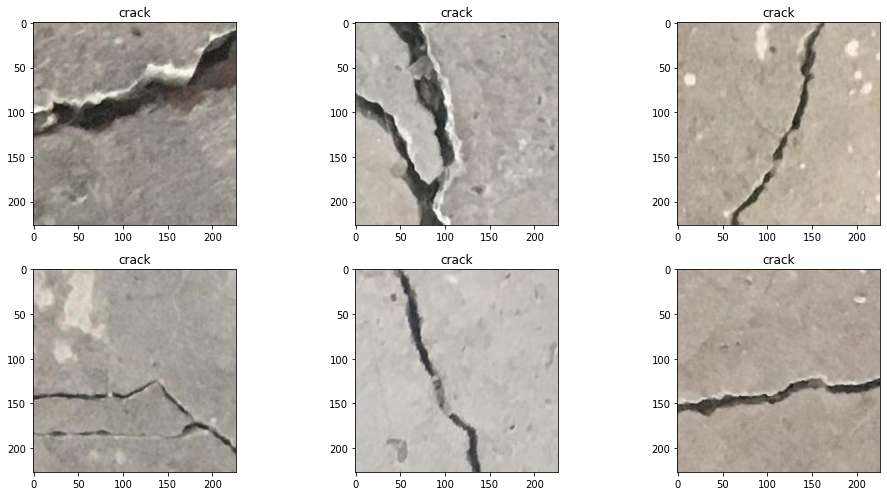

In [ ]:
plot_images(train_dir, label="crack")

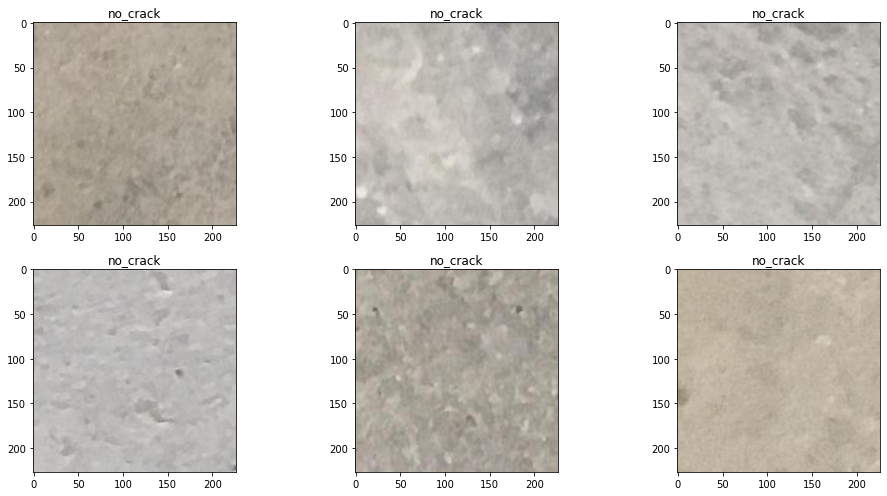

In [ ]:
plot_images(train_dir, label="no_crack")

####3.1.2.Preprocessing and Augmentation

In [3]:
img_size = 150
output_size = 1 #Use sigmoid function
batch_size = 256

In [ ]:
train_datagen = ImageDataGenerator( rescale=1.0/255.0,
                                    rotation_range=30,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest" )

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_dataloader = train_datagen.flow_from_directory(train_dir, 
                                                    class_mode='binary', 
                                                    batch_size=batch_size, 
                                                    target_size=(img_size, img_size))

valid_dataloader = val_datagen.flow_from_directory(valid_dir, 
                                        class_mode='binary', 
                                        batch_size=batch_size, 
                                        target_size=(img_size, img_size))

test_dataloader = test_datagen.flow_from_directory(test_dir, 
                                        class_mode='binary', 
                                        batch_size=batch_size, 
                                        target_size=(img_size, img_size))

Found 28000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


####3.1.3.Model LeNet

In [ ]:
lenet_model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(img_size,img_size,3)),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation='relu'),
            tf.keras.layers.Dense(84, activation='relu'),
            tf.keras.layers.Dense(output_size, activation='sigmoid')])

In [ ]:
lenet_model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
lenet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 150, 150, 6)       456       
                                                                 
 average_pooling2d_6 (Averag  (None, 75, 75, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_59 (Conv2D)          (None, 71, 71, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 35, 35, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_7 (Flatten)         (None, 19600)             0         
                                                                 
 dense_21 (Dense)            (None, 120)              

In [ ]:
num_epochs = 20

checkpoint_path = "/content/save_model/lenet_concrete_crack.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = lenet_model.fit(train_dataloader,
                        epochs = num_epochs,
                        validation_data = valid_dataloader,
                        callbacks=[model_checkpoint, learning_rate_reduction])

Epoch 1/20
110/110 [==============================] - ETA: 0s - loss: 0.3294 - accuracy: 0.8793
Epoch 00001: val_accuracy improved from -inf to 0.93975, saving model to /content/save_model/lenet_concrete_crack.h5
110/110 [==============================] - 151s 1s/step - loss: 0.3294 - accuracy: 0.8793 - val_loss: 0.1369 - val_accuracy: 0.9398 - lr: 0.0010
Epoch 2/20
110/110 [==============================] - ETA: 0s - loss: 0.0670 - accuracy: 0.9795
Epoch 00002: val_accuracy improved from 0.93975 to 0.98200, saving model to /content/save_model/lenet_concrete_crack.h5
110/110 [==============================] - 149s 1s/step - loss: 0.0670 - accuracy: 0.9795 - val_loss: 0.0537 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 3/20
110/110 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9845
Epoch 00003: val_accuracy improved from 0.98200 to 0.98462, saving model to /content/save_model/lenet_concrete_crack.h5
110/110 [==============================] - 148s 1s/step - loss: 0

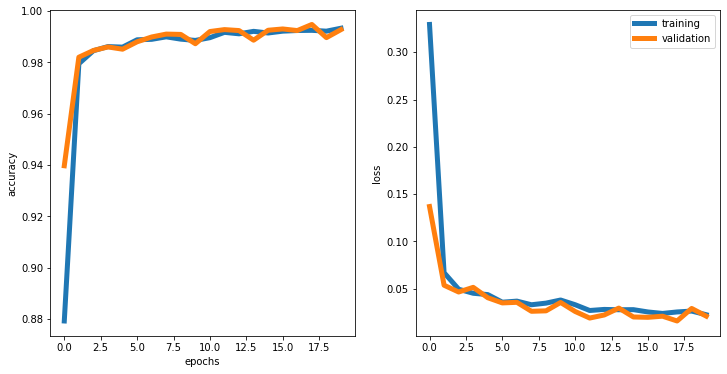

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
lenet_model.load_weights("/content/save_model/lenet_concrete_crack.h5")

In [ ]:
loss, accuracy = lenet_model.evaluate(test_dataloader, steps=len(test_dataloader), verbose=1)

16/16 [==============================] - 4s 271ms/step - loss: 0.0120 - accuracy: 0.9958


####3.1.4.Model VGG16

**Base Model**

In [ ]:
vgg16_model = tf.keras.models.Sequential([
                # 1st Conv Block
                tf.keras.layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu', input_shape=(img_size,img_size,3)),
                tf.keras.layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 2nd Conv Block
                tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 3rd Conv block
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 4th Conv block
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 5th Conv block
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(units = 4096, activation ='relu'),
                tf.keras.layers.Dense(units = 4096, activation ='relu'),
                tf.keras.layers.Dense(units = output_size, activation ='sigmoid')])

In [ ]:
vgg16_model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
vgg16_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_151 (Conv2D)         (None, 150, 150, 64)      1792      
                                                                 
 conv2d_152 (Conv2D)         (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_153 (Conv2D)         (None, 75, 75, 128)       73856     
                                                                 
 conv2d_154 (Conv2D)         (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 38, 38, 128)      0         
 g2D)                                                

In [ ]:
num_epochs = 20

checkpoint_path = "/content/save_model/base_vgg16_concrete_crack.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = vgg16_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

Epoch 1/20
110/110 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.4995
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to /content/save_model/base_vgg16_concrete_rack.h5
110/110 [==============================] - 156s 1s/step - loss: 0.6965 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
110/110 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4984
Epoch 00002: val_accuracy did not improve from 0.50000
110/110 [==============================] - 154s 1s/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
110/110 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4976
Epoch 00003: val_accuracy did not improve from 0.50000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
110/110 [==============================] - 155s 1s/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6932 -

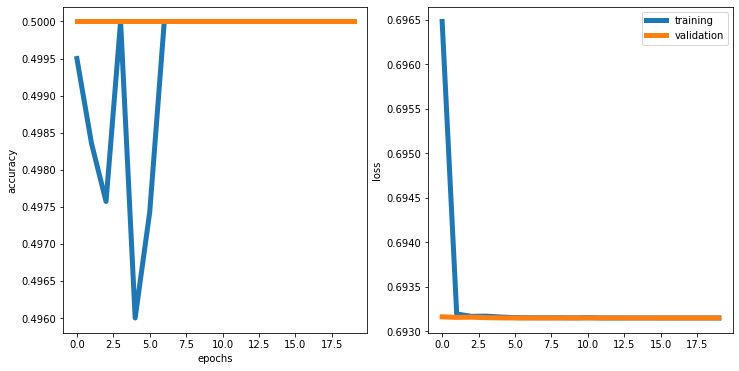

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
vgg16_model.load_weights("/content/save_model/base_vgg16_concrete_crack.h5")
loss, accuracy = vgg16_model.evaluate(test_dataloader, verbose=1)

16/16 [==============================] - 5s 290ms/step - loss: 0.6932 - accuracy: 0.5000


**Improve VGG16**
- Use `he_uniform` initializer

In [ ]:
vgg16_model = tf.keras.models.Sequential([
                # 1st Conv Block
                tf.keras.layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_size,img_size,3)),
                tf.keras.layers.Conv2D(filters =64, kernel_size =3,padding='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 2nd Conv Block
                tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 3rd Conv block
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 4th Conv block
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 5th Conv block
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(units = 4096, activation ='relu'),
                tf.keras.layers.Dense(units = 4096, activation ='relu'),
                tf.keras.layers.Dense(units = 1, activation ='sigmoid')])

In [13]:
vgg16_model.compile(optimizer='sgd',loss="binary_crossentropy", metrics=['accuracy'])
vgg16_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_53 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_55 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 38, 38, 128)      0         
 g2D)                                                 

In [ ]:
num_epochs = 20

checkpoint_path = "/content/save_model/improved_vgg16_concrete_crack.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = vgg16_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

Epoch 1/20
110/110 [==============================] - ETA: 0s - loss: 0.7215 - accuracy: 0.6553
Epoch 00001: val_accuracy improved from -inf to 0.53938, saving model to /content/save_model/improved_vgg16_concrete_crack.h5
110/110 [==============================] - 156s 1s/step - loss: 0.7215 - accuracy: 0.6553 - val_loss: 0.6502 - val_accuracy: 0.5394 - lr: 0.0100
Epoch 2/20
110/110 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.6343
Epoch 00002: val_accuracy improved from 0.53938 to 0.86263, saving model to /content/save_model/improved_vgg16_concrete_crack.h5
110/110 [==============================] - 155s 1s/step - loss: 0.6566 - accuracy: 0.6343 - val_loss: 0.5721 - val_accuracy: 0.8626 - lr: 0.0100
Epoch 3/20
110/110 [==============================] - ETA: 0s - loss: 0.6198 - accuracy: 0.6743
Epoch 00003: val_accuracy did not improve from 0.86263
110/110 [==============================] - 154s 1s/step - loss: 0.6198 - accuracy: 0.6743 - val_loss: 0.5095 - v

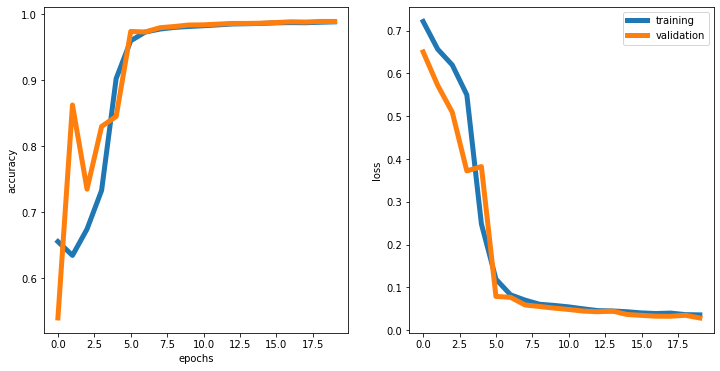

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
vgg16_model.load_weights("/content/save_model/improved_vgg16_concrete_crack.h5")

In [ ]:
loss, accuracy = vgg16_model.evaluate(test_dataloader, verbose=1)

16/16 [==============================] - 5s 300ms/step - loss: 0.0261 - accuracy: 0.9923


###3.2.Cassava Leaf Disease Dataset
[Ref](https://www.kaggle.com/c/cassava-leaf-disease-classification)

####3.2.1.Load Data

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/emcassavadata/cassavaleafdata.zip \
                -O /content/cassavaleafdata.zip
!unzip '/content/cassavaleafdata.zip'

Streaming output truncated to the last 5000 lines.
  inflating: cassavaleafdata/train/cgm/train-cgm-679.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-68.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-680.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-681.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-682.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-683.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-684.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-685.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-686.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-687.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-688.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-689.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-69.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-690.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-691.jpg  
  inflating: cassavaleafdata/train/cgm/train-cgm-692.jpg  
  infla

In [ ]:
base_dir = '/content/cassavaleafdata'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
labels_dict = {
     "cbb": "Cassava Bacterial Blight (CBB)",
     "cbsd": "Cassava Brown Streak Disease (CBSD)",
     "cgm": "Cassava Green Mottle (CGM)",
     "cmd": "Cassava Mosaic Disease (CMD)",
     "healthy": "Healthy"
}

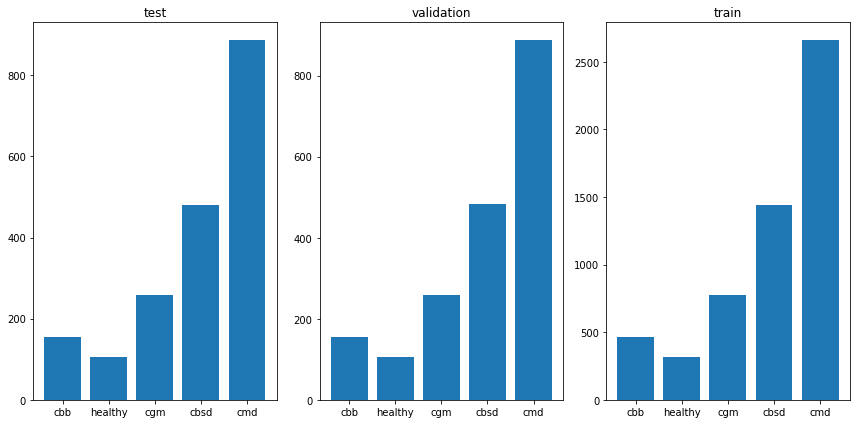

In [ ]:
def show_labels(data_dir):
    data = os.listdir(data_dir)
    fig, ax = plt.subplots(1, len(data), figsize=(12,6))
    for idx in range(len(data)):
        sub_dir = os.path.join(data_dir, data[idx])
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].bar(labels, list_data)
        ax[idx].set_title(data[idx])
        # ax[idx].axis('off')
    plt.tight_layout()
    plt.show()
show_labels(base_dir)

In [ ]:
def plot_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = mpimg.imread(image_dir)
        label = image_dir.split('/')[-2]
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(labels_dict[label])
        ax[i//(num_sample//2)][i%(num_sample//2)].axis('off')
    plt.tight_layout()
    plt.show()

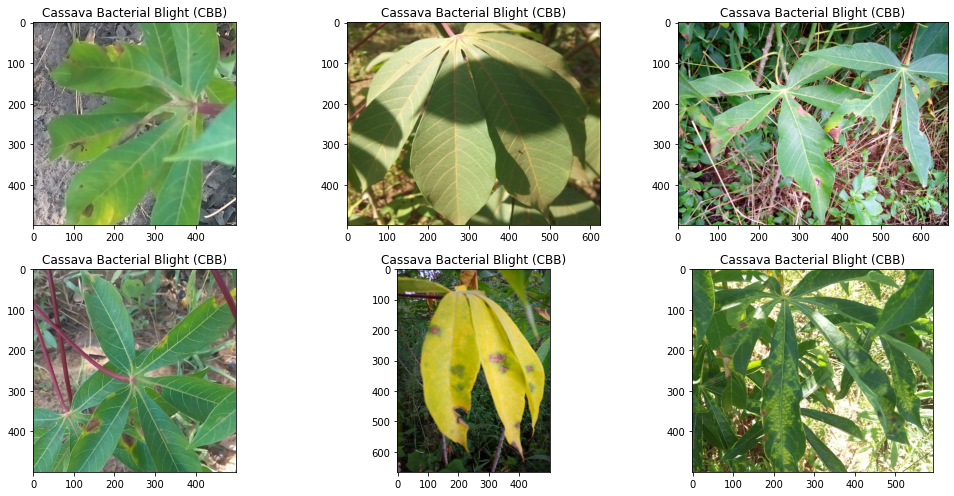

In [ ]:
plot_images(train_dir, label="cbb")

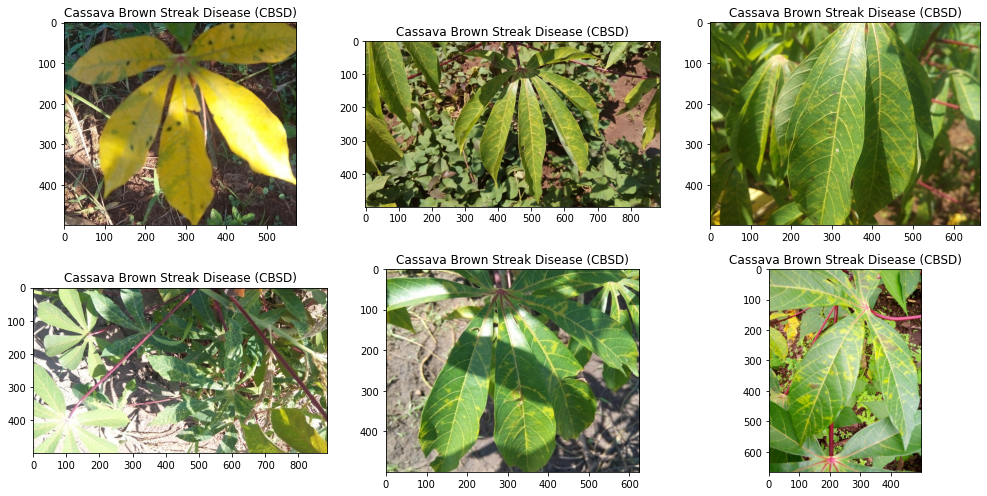

In [ ]:
plot_images(train_dir, label="cbsd")

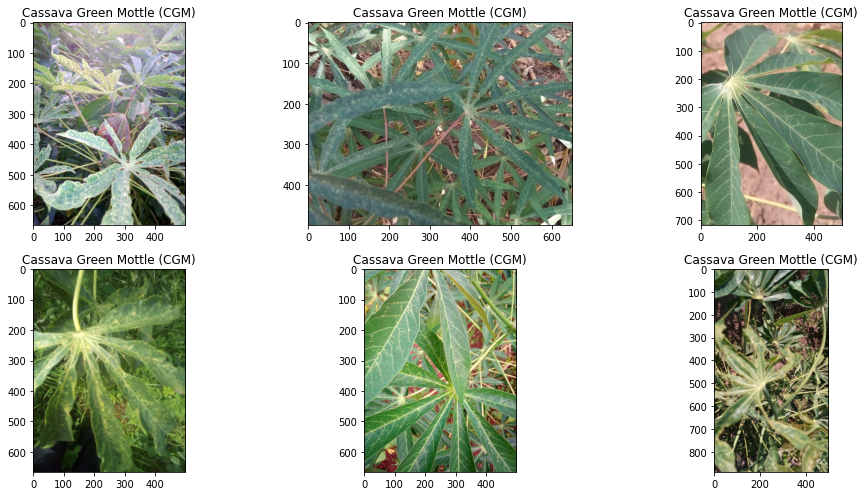

In [ ]:
plot_images(train_dir, label="cgm")

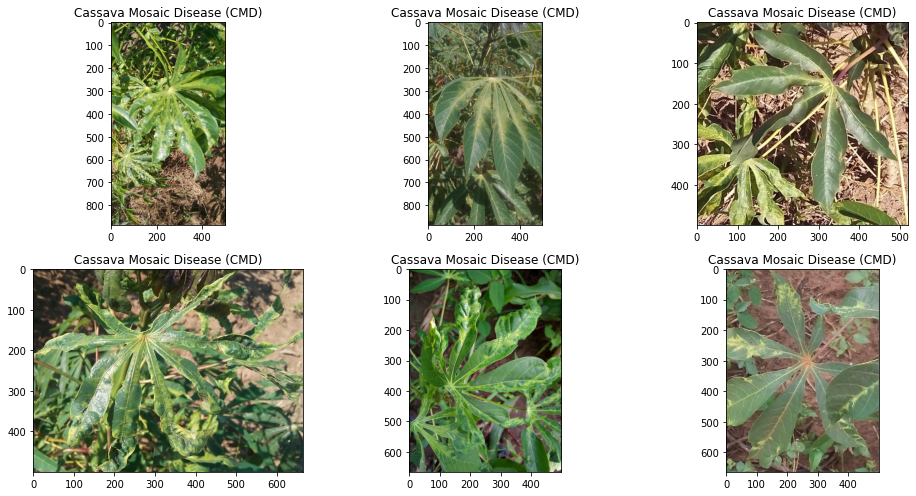

In [ ]:
plot_images(train_dir, label="cmd")

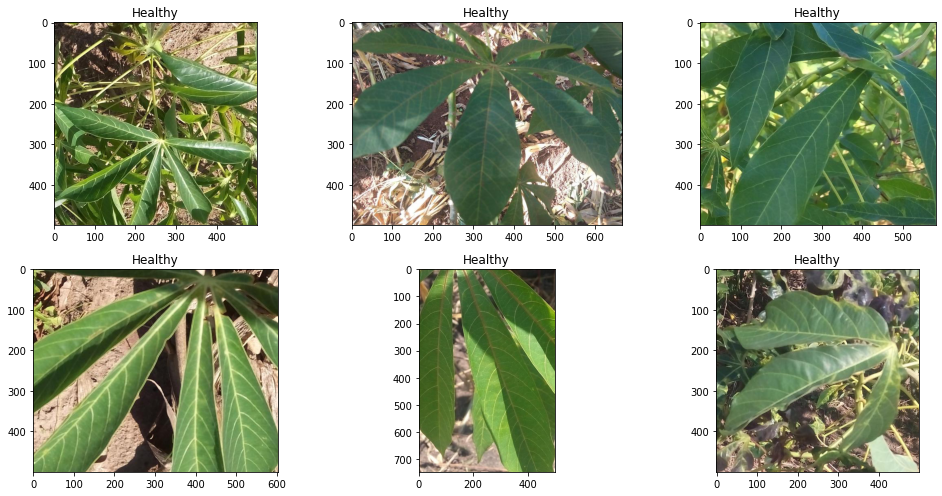

In [ ]:
plot_images(train_dir, label="healthy")

####3.2.2.Preprocessing and Augmentation

In [ ]:
img_size = 150
output_size = 5
batch_size = 128

In [ ]:
train_datagen = ImageDataGenerator( rescale=1.0/255.0,
                                    rotation_range=30, 
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest" )

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_dataloader = train_datagen.flow_from_directory(train_dir, 
                                                     batch_size=batch_size, 
                                                     target_size=(img_size, img_size))

valid_dataloader = val_datagen.flow_from_directory(valid_dir,  
                                         batch_size=batch_size, 
                                         target_size=(img_size, img_size))

test_dataloader = test_datagen.flow_from_directory(test_dir, 
                                           batch_size=batch_size,
                                           shuffle = False,
                                           target_size=(img_size, img_size))

Found 5656 images belonging to 5 classes.
Found 1889 images belonging to 5 classes.
Found 1885 images belonging to 5 classes.


In [ ]:
def show_aug(images):
    fig, axis = plt.subplots(1, 5, figsize=(20, 20))
    axis = axis.flatten()
    for img, ax in zip(images, axis):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
imgs = [train_dataloader[0][0][0] for i in range(5)]

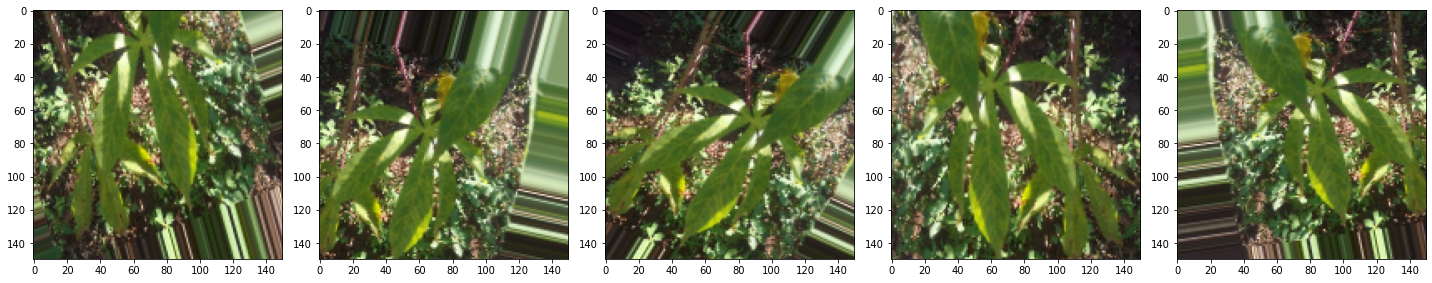

In [ ]:
show_aug(imgs)

####3.2.4.Model LeNet

In [ ]:
lenet_model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', 
                            padding='same', input_shape=(img_size,img_size,3)),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation='relu'),
            tf.keras.layers.Dense(84, activation='relu'),
            tf.keras.layers.Dense(output_size, activation='softmax')])

In [ ]:
lenet_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 6)       456       
                                                                 
 average_pooling2d_2 (Averag  (None, 75, 75, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 35, 35, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 19600)             0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
num_epochs = 20

checkpoint_path = "/content/save_model/lenet_cassava.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = lenet_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

Epoch 1/20
45/45 [==============================] - ETA: 0s - loss: 1.2978 - accuracy: 0.4781
Epoch 00001: val_accuracy improved from -inf to 0.47962, saving model to /content/save_model/lenet_cassava.h5
45/45 [==============================] - 65s 1s/step - loss: 1.2978 - accuracy: 0.4781 - val_loss: 1.2661 - val_accuracy: 0.4796 - lr: 0.0010
Epoch 2/20
45/45 [==============================] - ETA: 0s - loss: 1.2493 - accuracy: 0.5235
Epoch 00002: val_accuracy improved from 0.47962 to 0.59079, saving model to /content/save_model/lenet_cassava.h5
45/45 [==============================] - 65s 1s/step - loss: 1.2493 - accuracy: 0.5235 - val_loss: 1.1753 - val_accuracy: 0.5908 - lr: 0.0010
Epoch 3/20
45/45 [==============================] - ETA: 0s - loss: 1.2039 - accuracy: 0.5502
Epoch 00003: val_accuracy improved from 0.59079 to 0.59291, saving model to /content/save_model/lenet_cassava.h5
45/45 [==============================] - 65s 1s/step - loss: 1.2039 - accuracy: 0.5502 - val_loss:

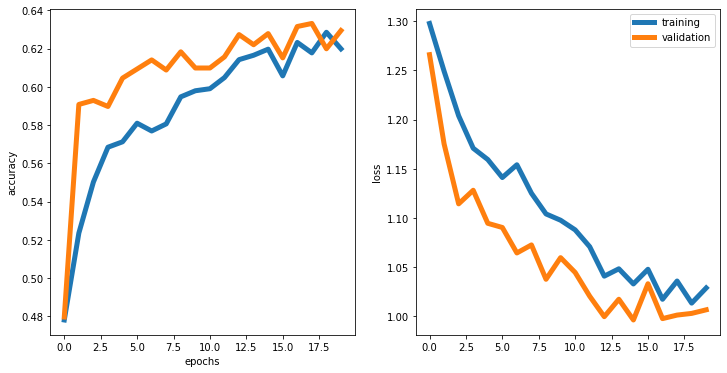

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
lenet_model.load_weights("/content/save_model/lenet_cassava.h5")

In [ ]:
loss, accuracy = lenet_model.evaluate(test_dataloader, steps=len(test_dataloader), verbose=1)

15/15 [==============================] - 11s 717ms/step - loss: 0.9912 - accuracy: 0.6419


In [ ]:
test_pred = lenet_model.predict(test_dataloader)

In [ ]:
confusion_matrix(test_pred.argmax(axis = 1), test_dataloader.labels)

array([[ 26,  21,   3,   0,   0],
       [ 98, 379,  71,  85,  59],
       [  0,   1,   7,   2,   5],
       [ 31,  80, 177, 798,  41],
       [  0,   0,   0,   1,   0]])

In [ ]:
report = classification_report(test_pred.argmax(axis = 1), 
                      test_dataloader.labels, 
                      labels = [0,1,2,3,4])
print(report)

              precision    recall  f1-score   support

           0       0.17      0.52      0.25        50
           1       0.79      0.55      0.65       692
           2       0.03      0.47      0.05        15
           3       0.90      0.71      0.79      1127
           4       0.00      0.00      0.00         1

    accuracy                           0.64      1885
   macro avg       0.38      0.45      0.35      1885
weighted avg       0.83      0.64      0.72      1885



####3.2.5.Model VGG16

In [ ]:
vgg16_model = tf.keras.models.Sequential([
                # 1st Conv Block
                tf.keras.layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_size,img_size,3)),
                tf.keras.layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 2nd Conv Block
                tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 3rd Conv block
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =256, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 4th Conv block
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # 5th Conv block
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.Conv2D(filters =512, kernel_size =3, padding ='same', activation='relu', kernel_initializer='he_uniform'),
                tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same'),

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(units = 4096, activation ='relu'),
                tf.keras.layers.Dense(units = 4096, activation ='relu'),
                tf.keras.layers.Dense(units = output_size, activation ='sigmoid')])

In [ ]:
vgg16_model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=['accuracy'])
vgg16_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_44 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_46 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 38, 38, 128)      0         
 g2D)                                                 

In [ ]:
num_epochs=20
checkpoint_path = "/content/save_model/vgg16_cassava.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = vgg16_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

Epoch 1/20
45/45 [==============================] - ETA: 0s - loss: 38.4025 - accuracy: 0.4275
Epoch 00001: val_accuracy improved from -inf to 0.46956, saving model to /content/save_model/vgg16_cassava.h5
45/45 [==============================] - 69s 2s/step - loss: 38.4025 - accuracy: 0.4275 - val_loss: 1.3392 - val_accuracy: 0.4696 - lr: 0.0010
Epoch 2/20
45/45 [==============================] - ETA: 0s - loss: 1.3412 - accuracy: 0.4699
Epoch 00002: val_accuracy did not improve from 0.46956
45/45 [==============================] - 67s 1s/step - loss: 1.3412 - accuracy: 0.4699 - val_loss: 1.3269 - val_accuracy: 0.4696 - lr: 0.0010
Epoch 3/20
45/45 [==============================] - ETA: 0s - loss: 1.3491 - accuracy: 0.4699
Epoch 00003: val_accuracy did not improve from 0.46956

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
45/45 [==============================] - 67s 1s/step - loss: 1.3491 - accuracy: 0.4699 - val_loss: 1.3315 - val_accuracy: 0.4696 - 

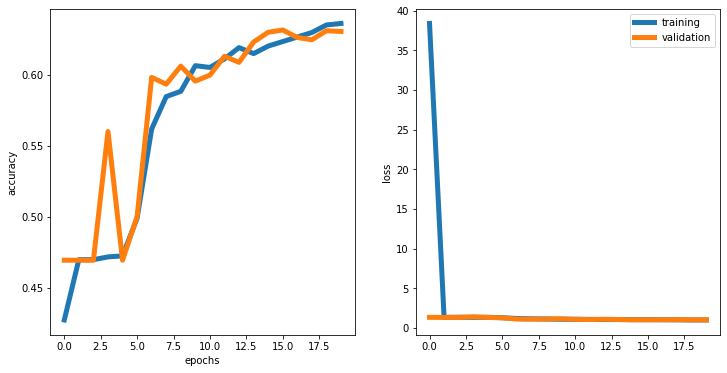

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
vgg16_model.load_weights("/content/save_model/vgg16_cassava.h5")

In [ ]:
loss, accuracy = vgg16_model.evaluate(test_dataloader, steps=len(test_dataloader), verbose=1)

15/15 [==============================] - 11s 731ms/step - loss: 1.0155 - accuracy: 0.6207


In [ ]:
test_pred = vgg16_model.predict(test_dataloader)

In [ ]:
confusion_matrix(test_pred.argmax(axis = 1), test_dataloader.labels)

array([[ 27,  23,   0,   0,   5],
       [100, 363,  59, 106,  63],
       [  0,   0,   0,   0,   0],
       [ 28,  95, 199, 780,  37],
       [  0,   0,   0,   0,   0]])

In [ ]:
report = classification_report(test_pred.argmax(axis = 1), 
                      test_dataloader.labels, 
                      labels = [0,1,2,3,4])
print(report)

              precision    recall  f1-score   support

           0       0.17      0.49      0.26        55
           1       0.75      0.53      0.62       691
           2       0.00      0.00      0.00         0
           3       0.88      0.68      0.77      1139
           4       0.00      0.00      0.00         0

    accuracy                           0.62      1885
   macro avg       0.36      0.34      0.33      1885
weighted avg       0.81      0.62      0.70      1885



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
